## Abstract ##
Photos and videos are result of our camera recording light. Humans have an ultimate sensor called EYES, that's why the light is the most important aspect and it defines the look they feel the quality of photos and videos. The race this light emits are scattered across objects and reflected by other objects. Each ray from this light source gets bounced billions of times before it gets to the camera sensor. This is why real life looks so good! Good models, textures, materials, eternal variety of elements and enormous amount of light bounces, captured by our eyes or camera. But computers have limits of what they can calculate… In real life eyes are capturing uncountable amount of data non-stop! Computers are far away from that kind of processing power and clever people came up with the different rendering methods. In this project we will talk about one of the most exciting rendering methods, called __Ray tracing__.

https://www.csee.umbc.edu/~olano/class/435-02-8/ray-sphere.html

https://www.techopedia.com/definition/21614/ray-casting#:~:text=Ray%20casting%20is%20capable%20of,based%20on%20certain%20geometric%20constraints.

superprof.co.uk/resources/academic/maths/analytical-geometry/vectors/3d-vectors.html




### Table of Contents

* [Chapter 1](#chapter1)
    * [Section 1.1](#section_1_1)
    * [Section 1.2](sSection_1_2)
        * [Vectors in 3D space](#123)
        * [Section 1.2.2](#section_1_2_2)
        * [Section 1.2.3](#section_1_2_3)
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)

## 1. Description of Ray tracing ##

Ray tracing is a technique for modeling light transport in 3D computer graphics that can be used in a number of rendering techniques to generate digital images. Casting light rays backwards into a scene and tracking their courses as they bounce around in search of a light source. It's not a particularly fast technique (and thus unsuitable for real-time rendering), but it can yield quite realistic results. Ray tracing was first used in applications where a long render time could be tolerated, such as still computer-generated images and film and television visual effects (VFX), but it was less well adapted to real-time applications, such as video games, where frame rate is crucial. However, since 2018, real-time ray tracing hardware acceleration has become standard on new commercial graphics cards, and graphics APIs have followed suit, allowing developers to use hybrid ray tracing and rasterization-based rendering in games and other real-time applications with reduced frame render times.
Ray tracing may simulate a wide range of optical effects, including reflection, refraction, soft shadows, scattering, depth of field, motion blur, caustics, ambient occlusion, and dispersion (such as chromatic aberration). It can also track the passage of sound waves in the same way that light waves can, giving it a possible choice for more immersive sound design in video games by generating realistic reverberation and echoes. Ray tracing can be used to recreate any physical wave or particle phenomenon with approximately linear velocity.


### Points in 3D space ###
To locate a point in a plane, two numbers are necessary. We know that any point in the plane can be represented as an ordered pair (a, b) of real numbers, where a is the x-coordinate and b is the y-coordinate. For this reason, a plane is called two-dimensional. 
To locate a point in space, three numbers are required. We represent any point in space by an ordered triple (a, b, c) of real numbers. To represent points in space, we first choose a fixed point __O__ (the origin) and three directed lines through O that are perpendicular to each other, called the coordinate axes, and labeled the __x-axis, y-axis, and z-axis__. Usually we think of the x- and y-axes as being horizontal and the z-axis as being vertical.


![Alttext](https://raw.githubusercontent.com/Vselenis/Math-Concepts-for-Developers-March-2022/main/Ray%20Tracing%20Adventure/Drawings/Point%20in%203D%20space.png)

The three coordinate axes determine the three coordinate planes. The xy-plane is the plane that contains the x- and y-axes; the yz-plane contains the y- and z-axes; the xz-plane contains the x- and z-axes. These three coordinate planes divide space into eight parts, called octants. The first octant, in the foreground, is determined by the positive axes.


<IPython.core.display.Javascript object>


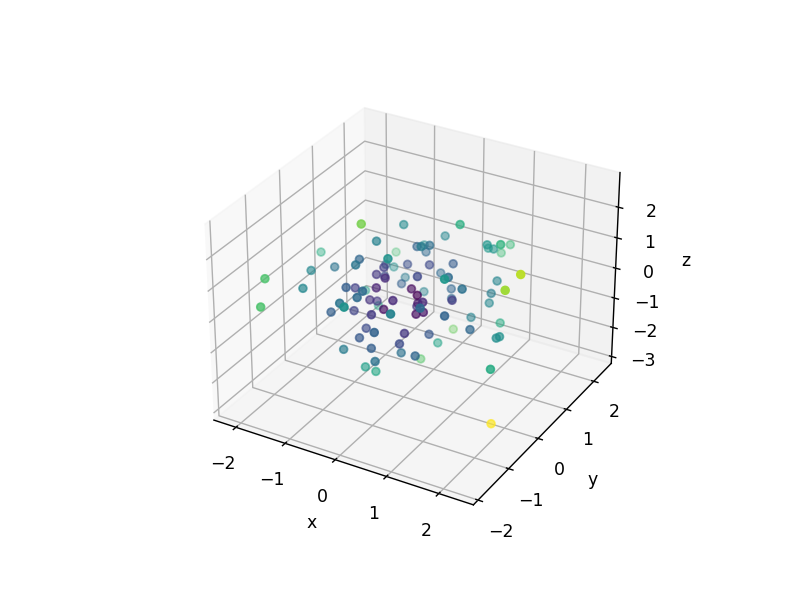

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D #Enabling 3D projections

%matplotlib notebook 
#We can click and drag our 3d projection

x = np.random.normal(size=100)
y = np.random.normal(size=100)
z = np.random.normal(size=100)


fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x,y,z,c=np.linalg.norm([x,y,z],axis=0))

ax.set(xlabel='x', ylabel='y', zlabel='z')
plt.show()

### Vectors in 3D space <a class="anchor" id="123"></a>
A 3D vector is a line segment in three-dimensional space running from point **A (tail)** to point **B (head)**. Each vector has a magnitude (or length) and direction. When we are working in a 3 dimension space, we always consider all three coordinate bases which are the x-axis, y-axis, and z-axis. For example, we have two points in the 3 dimension space and they are point $A(x_{1}, y_{1}, z_{1})$ and point $B(x_{1}, y_{1}, z_{1})$. The coordinate of point A and B will be written:




\begin{equation}\ \vec{AB} =  (x_{2} - x_{1}), (y_{2} - y_{1}, (z_{2} - z_{1}) \end{equation}



<IPython.core.display.Javascript object>


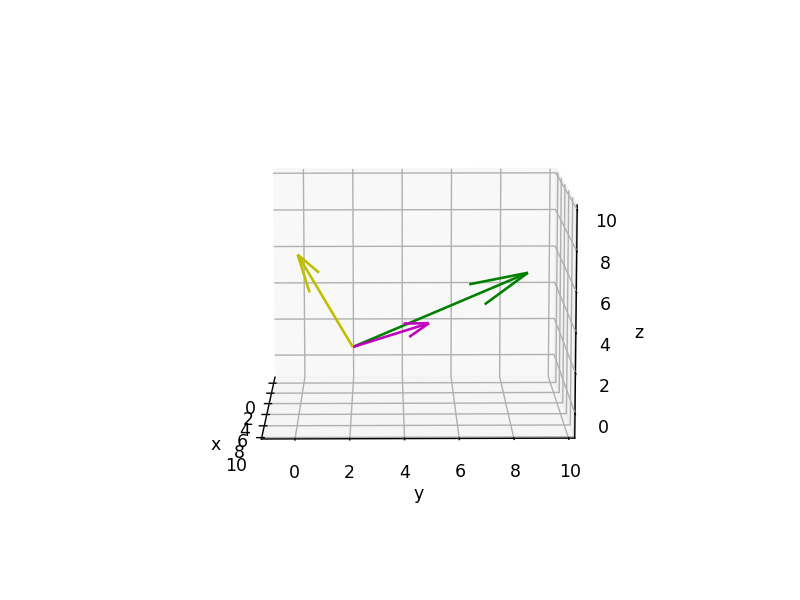

[0 7 4]


In [11]:
B = np.array([4, 5, 3])
C = np.array([6, 0, 7])
D = np.array([1, 9, 5])

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.set_xlim([-1,10])
ax.set_ylim([-1,10])
ax.set_zlim([-1,10])

A = np.array([1,2,1])

AB = B - A
AC = C - A
AD = D - A

ax.quiver(A[0], A[1],A[2], AB[0], AB[1], AB[2], color = "m") 
ax.quiver(A[0], A[1],A[2], AC[0], AC[1], AC[2], color = "y")
ax.quiver(A[0], A[1],A[2], AD[0], AD[1], AD[2], color = "g")
ax.view_init(10,10)

ax.set(xlabel='x', ylabel='y', zlabel='z')
plt.show()

### Magnitude ###
A vector's magnitude is its most important component, and a vector without it is just a direction with no strength. The length of the line segment that defines a vector is its magnitude. A vector's magnitude is always expressed as a positive number, with the exception of the zero vector. It's called the absolute value of $||V||$ =  magnitude(v). Pythagoras' theorem showed us how to compute this:

\begin{equation}\ ||V|| = \sqrt{V^{2}_{x} + V^{2}_{y} + V^{2}_{z}}\end{equation}


In [3]:
v = np.array([5,-5,3])

magnitude = np.linalg.norm(v)
print(magnitude)

7.681145747868608


### Normalization ###

Vectors exist in a variety of shapes and sizes, but how can we classify them? Using the unit vector as a guide. The unit vector has a simple definition: it is a vector with a magnitude of one. This indicates that a unit vector is any vector with a magnitude of one, regardless of direction. Normalization is the process of converting an arbitrary vector into a unit vector. It's called V hat - $\hat{V}$ = normalize(v). To normalize a vector, we need to divide the components of that vector by the magnitude of the vector.  


\begin{equation}\ \hat{V} = \frac{V}{||V||}\end{equation}

In [6]:
normalize = [number/magnitude for number in v]
print(normalize)

[0.6509445549041194, -0.6509445549041194, 0.39056673294247163]


_So our new array magically turned into unit vector:_

In [7]:
vector_length = np.linalg.norm(normalize)
print(vector_length)

1.0


### Dot product ###

The Python dot product is also known as a scalar product in algebraic operation which takes two equal-length sequences and returns a single number. When we working with vectors, we'll encounter a dot product when crossing rays with objects and when computing shading on a surface. The smaller the dot product, the greater the angle between the vectors. A dot product of 1 indicates that two unit vectors are identical, while a dot product of -1 indicates that they point in opposing directions. More specifically, if the two vectors are unit vectors, the dot product is the angle's cosine between them.

\begin{equation}\ V_{1} \cdot V_{2} = {x_{1}x_{2} + y_{1} y_{2} + z_{1} z_{2}}\end{equation}

In [73]:
M = np.array([-7, 0, 3])
N = np.array([2, 4, -5])
dot_product = np.dot(M, N)
print(dot_product)

-29


### Cross Product ###
The cross product is a vector operation that, unlike the dot product, outputs another vector rather than a scalar, as shown in the following test. Add it to your collection now.
If we take the cross product of X and Y, we get Z. Similarly, Y cross Z gets X, and Z cross X is Y. The results are always perpendicular to the inputs. Order is important here. X cross Y gives you Z, but Y cross X gives you -Z!

\begin{equation}\ V_{1}, V_{2} = {x_{1} - x_{2}, y_{1} - y_{2} , z_{1} - z_{2}}\end{equation}
\begin{equation}\ V_{2}, V_{1} = {x_{2} - x_{1}, y_{2} - y_{1} , z_{2} - z_{1}}\end{equation}

In [72]:
cross_product = np.cross(M, N)
cross_opposite = np.cross(N, M)
print(cross_product)
print(cross_opposite)

[-12 -29 -28]
[12 29 28]


### Multiplication of a vector by a number (scalar) ###

When a vector is multiplied by a positive number (for example 2), only the magnitude is modified; the direction stays unchanged.

When a vector is multiplied by a negative number (for example -2), not only is the magnitude changed, but also the direction.

\begin{equation}\ 2V = 2x, 2y , 2z \end{equation}

\begin{equation}\ -2V = -2x, -2y , -2z \end{equation}

<IPython.core.display.Javascript object>


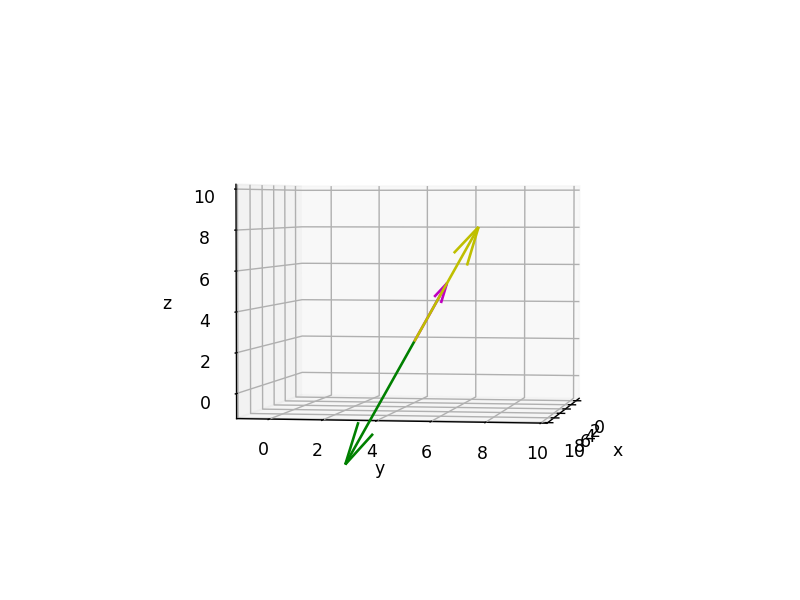

In [13]:
E = np.array([-2,1,3])
F = E * 2
G = E * -2

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.set_xlim([-1,10])
ax.set_ylim([-1,10])
ax.set_zlim([-1,10])

A = np.array([2,4,2])
ax.quiver(A[0], A[1],A[2], E[0], E[1], E[2], color = "m") 
ax.quiver(A[0], A[1],A[2], F[0], F[1], F[2], color = "y")
ax.quiver(A[0], A[1],A[2], G[0], G[1], G[2], color = "g")
ax.view_init(10,10)

ax.set(xlabel='x', ylabel='y', zlabel='z')
plt.show()

### Division of a vector by a number (scalar) ###

When a vector is divided by a scalar number, the vector is multiplied by the reciprocal of the number, resulting in a new vector.

\begin{equation}\ \frac{V}{2} = \frac{x}{2}, \frac{y}{2} , \frac{z}{ 2}\end{equation}

\begin{equation}\ - \frac{V}{2} = - \frac{x}{2}, - \frac{y}{2} , - \frac{z}{ 2}\end{equation}

<IPython.core.display.Javascript object>


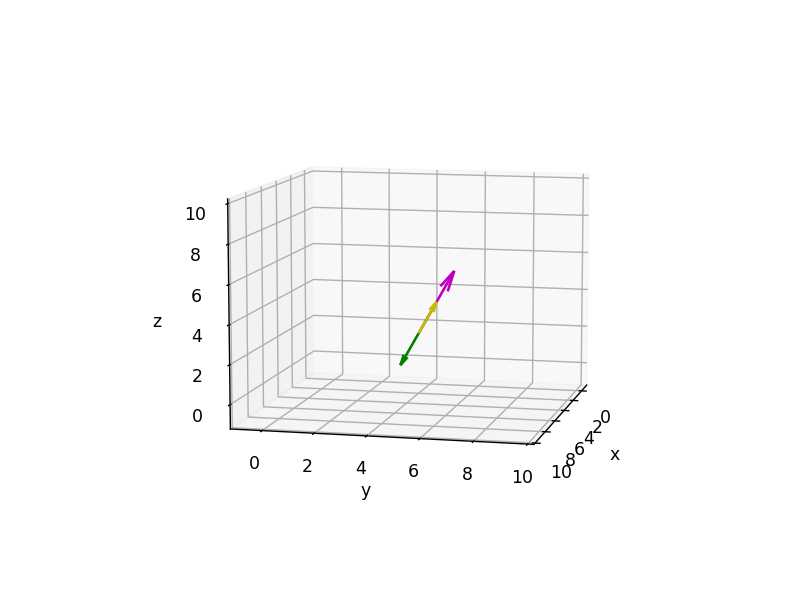

In [14]:
H = E / 2
I = E / -2

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.set_xlim([-1,10])
ax.set_ylim([-1,10])
ax.set_zlim([-1,10])

ax.quiver(A[0], A[1],A[2], E[0], E[1], E[2], color = "m") 
ax.quiver(A[0], A[1],A[2], H[0], H[1], H[2], color = "y")
ax.quiver(A[0], A[1],A[2], I[0], I[1], I[2], color = "g")
ax.view_init(10,10)

ax.set(xlabel='x', ylabel='y', zlabel='z')
plt.show()

### Pixel ### 
Image looks like a very complex piece of math? No, it’s actually super simple! Let's begin with a brief introduction to the pixel, the most fundamental building component of digital images. A pixel is the smallest controllable element of an image. If we take an image and we zoom in we'll eventually end up seeing all these tiny squares and if we keep zooming in the squares will grow larger but they'll never split into any more squares that's because we're looking at the smallest unit of the image. 
Computers in general will always prefer binary system. Let's see what 1 and 0 mean in our case. In a binary image zero stands for black and one stands for white, which is also equivalent to false and true. In the background we see beautiful data structure which we call a matrix. But what happens if our image contains more than just two colors? And we can no longer describe it in a binary form?

In this case the best color format to describe this image would be grayscale. The __Grayscale__ format is using numbers anywhere from 0 to 255 to describe the intensity of colors. Once again 0 is black and 255 is white. Grayscale images have many shades of gray in between. But this give as only measuring the intensity of one particular shade. What happens when we need to measure the intensity of colors across several shades?


### RGB ### 

We can use RGB format to describe a colorful image. RGB stands for __Red__, __Green__, and __Blue__. it measures the intensity of each of these colors on a particular pixel. We are also using values from 0 to 255. The only difference is we'll be checking across three different color channels, not just one. When you mix those three hues in different proportions, you get just much any other color you can think of, from red, yellow, and green to cyan, blue, and purple, and anything in between. A color, like vectors and points, is a tuple! A (red, green, blue) tuple can be used to make any color.

   | Index | 0  |  1  |  2  | 
|---:|:-------------|:-----------|:------|
| 0 | (<font color='red'>R</font>, <font color='green'>G</font>, <font color='blue'>B</font>)  | (<font color='red'>R</font>, <font color='green'>G</font>, <font color='blue'>B</font>)       | (<font color='red'>R</font>, <font color='green'>G</font>, <font color='blue'>B</font>)   | 
| 1 | (<font color='red'>R</font>, <font color='green'>G</font>, <font color='blue'>B</font>)  | (<font color='red'>R</font>, <font color='green'>G</font>, <font color='blue'>B</font>)   | (<font color='red'>R</font>, <font color='green'>G</font>, <font color='blue'>B</font>)   |

<IPython.core.display.Javascript object>


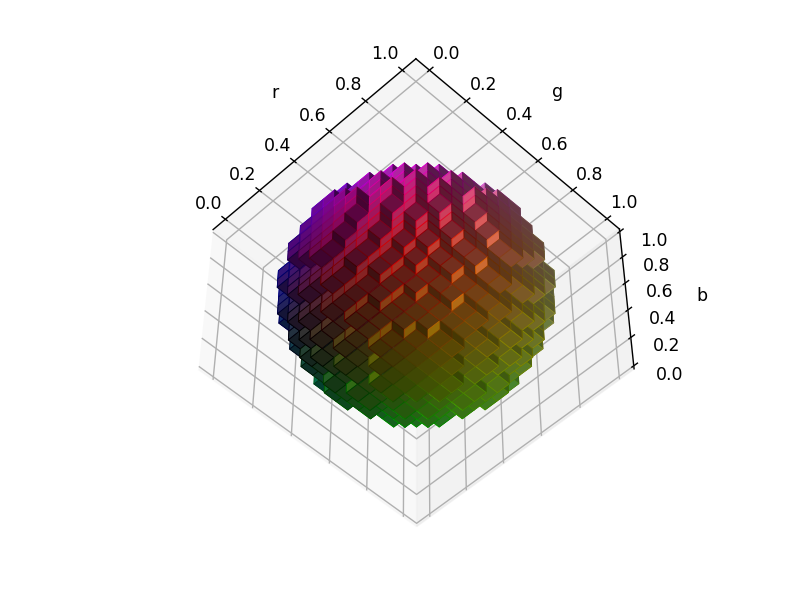

In [15]:
def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, g, b = np.indices((17, 17, 17)) / 16.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

# define a sphere about [0.5, 0.5, 0.5]
sphere = (rc - 0.5)**2 + (gc - 0.5)**2 + (bc - 0.5)**2 < 0.5**2

# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(r, g, b, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)

ax.set(xlabel='r', ylabel='g', zlabel='b')
plt.show()

### Canvas ### 

A canvas is a virtual drawing board that the ray tracer will utilize to convert scenes into visible images. A canvas is nothing more than a rectangular grid of pixels, similar to the one on every computer screen. We'll provide the __height__ and __width__ of our canvas in the code below. Our image is made up of __pixels__ that will be stored in a matrix. Each pixel will be represented as a tuple with (R, G, B) colors.

### Ray-Sphere Intersections ###

Ray casting is a rendering technique used in computer graphics and computational geometry. It is capable of creating a three-dimensional perspective in a two-dimensional map. Ray casting is the process of creating a ray, or line, and finding the intersections of that ray with the objects in a scene. Each ray have a starting point called the origin __O__, and a vector called the direction __D__ witch says where it points. Armed with a ray’s origin and direction, we can find points that lie any distance __t__ along the ray. With these 2 vectors, we can represent any point P on the ray like this:

\begin{equation}\ P = O + D * t \end{equation}

Each point will have a specific t value, representing how far along the direction vector the point lies, but the equation remains the same otherwise.

Spheres are even simpler. Given that spheres don’t have a direction, all we need is the location of the center point __M__, and the radius of the sphere __r__. This means our sphere object will simply be a struct containing one vector and one float. For all points __P__ at the surface of the sphere, the following equation holds:

\begin{equation}\ (P - M)\cdot(P - M) = r^2 \end{equation}

To find the intersection between the sphere and the ray we can replace P by __R(t) = O + D*t__. After simplification and using the equation for  ray to sphere __L =  O – M__, we arrive at:

\begin{equation}\ (D \cdot D)t^2 + 2(L \cdot D)t + L \cdot L  - r^2 = at^2 + bt + c = 0 \end{equation}

\begin{equation}\ a = D \cdot D \end{equation}

\begin{equation}\ b = 2(L \cdot D) \end{equation}

\begin{equation}\ c = L \cdot L  - r^2  \end{equation}

The solutions to this second-degree polynomial are:

\begin{equation}\ t_{0,1} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} \end{equation}


But we wanna know only the closest intersection, so we will replace $\pm$ with -. If camera sits in neagtive __z__ nearer objects will have smaller z coordinates.

If the discriminant $\Delta  = b^2 - 4ac$ < 0, the ray misses the sphere, and if $\Delta$ = 0, then the ray just touches the sphere, i.e., both intersections are the same. Otherwise, there will be two t-values that correspond to different intersection points:

\begin{equation}\ \Delta  = b^2 - 4ac \end{equation}

![Alttext](https://raw.githubusercontent.com/Vselenis/Math-Concepts-for-Developers-March-2022/main/Ray%20Tracing%20Adventure/pics/Ray-Sphere.png)

How we can find the hit position of our ray? We just need the new distance from the origin. How far the ray traveled before it hit the sphere? So we can just replace t with the new distance:

\begin{equation}\ ray(t) = ray_{origin} + ray_{direction} * t \end{equation}

\begin{equation}\ hit_{pos} = ray_{origin} + ray_{direction} * dist \end{equation}

Result is new vector witch tells us where the hit position is from the ray origin. For flat surface, the hit position is equal to the sphere color. For example, if the sphere is green, ray hit position must be set to green color.


### Aspect Ratio ###


Our rendered image is a window to a 3D scene. If we ignore the aspect ratio, it's a pretty big chance our sphere to be squashed or stretched. The reason is aspect ratio was strongly calculated. For example, if the screen view is 640 in width and 256 in height this means the screen is a rectangle in shape. The problem is that our pixels are squares. The problem can be solved with a screen extension:

\begin{equation}\ AspectRatio = \frac{width}{height} = \frac{640}{256} = 2.5 \end{equation}

\begin{equation}\ x_{max} = 1 \end{equation}

\begin{equation}\ x_{min} = - 1 \end{equation}

\begin{equation}\ y_{max} = \frac{1}{aspectratio} = \frac{1}{2.5} = 0.4 \end{equation}

\begin{equation}\ y_{min} = - y_{max} = - 0.4 \end{equation}


![Alttext](https://raw.githubusercontent.com/Vselenis/Math-Concepts-for-Developers-March-2022/main/Ray%20Tracing%20Adventure/pics/Aspect%20Ratio.png)






### Let there be light! ###

Lighting is one of the most important considerations for realistic 3D graphics. The goal is to simulate light sources and the way that the light that they emit interacts with objects in the scene. The properties of a surface that determine how it interacts light are referred to as the material of the surface. A surface can have several different material properties.



![Alttext](https://raw.githubusercontent.com/Vselenis/Math-Concepts-for-Developers-March-2022/1bb4104f8284c0b72e1bd67d43f86f7e659ec2fb/Ray%20Tracing%20Adventure/pics/Lighting%203D%20graphics.png)




#### Ambient Lights ####
The ambient term models the overall lighting level of the scene. It is a gross approximation of the amount of indirect bounced light present in the scene. Indirect bounces are what cause regions in shadow not to appear black. If you enter a dark room and if you give your eyes enough time, you can see some faint outline of the objects, thanks to ambient light. There is no specific direction and is unaffected by the viewing angle. As a result, ambient light is represented by a single color, which corresponds to the Phong equation's A color term (which is scaled by the surface's ambient reflectivity at runtime). Ambient light intensity and hue may vary.


#### Diffuse Lights #### 

The Diffuse term accounts for light that is reflected uniformly in all directions from each direct light source. Diffuse is when light hits a rough or matte surface like wood,  paper, or cloth. When light scatters (diffuses) in different directions equally, all materials exhibit diffuse reflection, unless it's a perfectly reflective surface like a mirror. Diffuse shading is very prominent if you look at a mat surface or in simple words a rough surface. Something that is not very reflective and shiny. So if you look at the second ball, it's not a completely flat color. 

 ##### Lambert shading model #####

![Alttext](https://raw.githubusercontent.com/Vselenis/Math-Concepts-for-Developers-March-2022/main/Ray%20Tracing%20Adventure/pics/Lambert%20shading%20model.png)

First picture: The light is falling directly perpendicular to the surface. We can see a zero-degree angle between the __S__ and __N__.  If you look at the normal surface which is pointing straight up the light, there is no angle between them. 

Second picture: The sun __S__ got tilted by 45 degrees to the normal __N__ of the surface. Light energy is not fully captured by the surface.

Third picture: Light not even touching the surface(90 degrees), it is just grazing through the surface. This means that none of the light energy falls on the surface.

We can use a trigonometric function called cosine. So cosine of 0 is 1, cosine of 90 is 0. The function can capture this loss of energy or how much light energy is captured based on the angle.


*Lambert’s Cosine Law – when light falls obliquely on a surface, the illumination of the surface is directly proportional to the cosine of the angle between the direction of the incident light and the surface's normal*

We are actually dealing with vectors again… Normal is a vector __N__ and the light falling is a vector __S__. So we can use dot product for 2 vectors to find the cosine. The cosine of an angle between two normalized vectors - must have a magnitude of 1:


\begin{equation}\ \cos(\theta) = S \cdot N \end{equation}

So how we can find the hit color? With our modified Lambert Shading Model:

\begin{equation}\ Color Surface = S \cdot N*K*C \end{equation}

Where:

• S is the ray towards light direction.

• N is the normal at hit position.

• K is the material’s diffuse coefficient. 

• C is the color of object.

Material’s diffuse coefficient __K__ shows us how much of the material absorbs. If the coefficient is 1 for example, the surface is very rough and we can see the full effect of the model. If the coefficient is close to 0, that means the surface is smooth. The effect will be really minimal.

Color of the object __C__ is the vector value. The dot product result should not be a negative number because the color will be removed from the final object. This is just the starting color before modification of the given formula.

#### Specular Lights #### 

The Specular term models the bright highlights we sometimes see when viewing a glossy surface. This is commonly observed in materials like marble or metals. Again most materials or objects show specular reflectivity. Specular highlights occur when the viewing angle is closely aligned with a path of direct reflection from a light source.

Specular shading is the reflection from a shiny surface. We see a faint outline of how specular looks in the picture above. Small shiny spot which is the light source. if it was a very rough surface, it would not have these shiny spots and the specular shading effect will be diminished.



##### Blinn-Phong Model #####

By modifying the algorithm, the problem with Phong in terms of reflection and view directions greater than 90 degrees can be overcome. The Blinn-Phong specular model is the name given to this improved model. The fundamental issue with Phong is that in order for the specular term to be non-zero, the angle between the view direction and the reflection direction must be less than 90 degrees.

The angle formed by __E__ and __R__ cannot exceed 90 degrees. Phong does not model cases like these correctly. The issue is that the dot product of the view and reflection directions can be negative, which does not produce a sensible answer when the rest of the equation is applied.

The Blinn model uses a different set of vectors for its computations, one that is less than 90 degrees in all valid cases. The Blinn model requires computing the half-angle vector __H__. The half-angle vector is the direction halfway between the eye vector __E__ and the light source position __S__. *It must be normalize - norm(H):*

\begin{equation}\ H = S + E \end{equation}

\begin{equation}\ Blinn Term = (H.R)^k \end{equation}



![Alttext](https://raw.githubusercontent.com/Vselenis/Math-Concepts-for-Developers-March-2022/main/Ray%20Tracing%20Adventure/pics/Blinn-Phong%20specular%20model.png)


Where:


• S is the source of light vector. Pointing from P to the position of the sun(in our case).

• E is the eye vector, pointing from P to the origin of the ray (usually, where
the eye exists that is looking at the scene).

• H is the halfway vector between the eye vector E and light-source S.

• N is the surface normal, a vector that is perpendicular to the surface at P.

• R is the reflection vector, pointing in the direction that incoming light would
bounce, or reflect.

• k is the material specular coefficient(shininess).



# Basic Ray Tracing Algorithm #